In [53]:
import pandas as pd
from pandas_datareader.data import DataReader
from datetime import date
import matplotlib.pyplot as plt 
from matplotlib import style
import numpy as np
import datetime as dt
from datetime import datetime
from pandas_datareader import data as wb
import quandl
style.use('dark_background') #enable if your Jupyter notebooks are in dark mode

In [54]:
today = dt.date.today()
start_date_input = today - dt.timedelta(days=365*5) 

def import_stock_data(tickers, start = start_date_input, end = today):
    data = pd.DataFrame()
    if len([tickers]) == 1:
        data[tickers] = wb.DataReader(tickers, data_source='yahoo', start = start)['Adj Close']
        data = pd.DataFrame(data)
    else:
        for t in tickers:
            data[t] = wb.DataReader(t, data_source='yahoo', start = start)['Adj Close']
    return(data)

ticker = 'MSFT'
market_ticker = 'SPY'
treasury_ticker = '^TNX'
market_risk_premium = 0.086 #Looked at in Bloomberg (EQRP)

market = import_stock_data(tickers = market_ticker)
company = import_stock_data(tickers = ticker)
ytm_treasury = import_stock_data(tickers = treasury_ticker)/100

In [55]:
#Finding the return on S&P 500
market['Daily Return'] = (market.pct_change())

#Finding the return on MSFT
company_return['Daily Return'] = (company.pct_change())

#Finding the monthly risk free rate
yearly_yield = ytm_treasury.to_numpy()
ytm_treasury['Monthly Yield'] = yearly_yield / 12

In [57]:
market_return_extra = (market['Daily Return'] - ytm_treasury['Monthly Yield']).dropna().to_numpy()
company_return_extra = (company_return['Daily Return'] - ytm_treasury['Monthly Yield']).dropna().to_numpy()

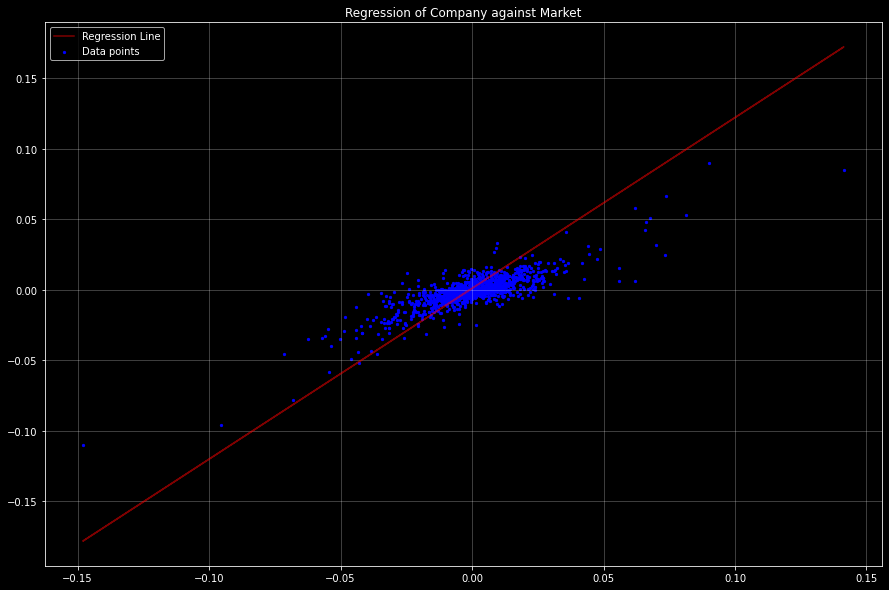

In [58]:
#Plotting Linear Regression
beta_company = np.polyfit(market_return_extra,company_return_extra,1)
ang_coeff = beta_company[0]
intercept = beta_company[1]
beta_eq = ang_coeff * company_return_extra + intercept 
beta_company = plt.figure(figsize=(15,10))
ax = beta_company.subplots()
ax.plot(company_return_extra, beta_eq,color = 'r', alpha = 0.5, label = 'Regression Line')
ax.scatter(company_return_extra,market_return_extra,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Regression of Company against Market')
plt.grid(alpha = 0.3)
ax.legend()
plt.show()

In [59]:
#Finding beta, adjusted beta, and the cost of equity
beta_company = np.polyfit(market_return_extra,company_return_extra,1)
my_beta = beta_company[0]
adj_beta = my_beta * (2/3) + 0.33
rf = 0.00
r = 0.00 + adj_beta * market_risk_premium
print('Microsoft cost of equity is ' + str(r))
print('Microsoft beta found from regression is ' + str(beta_company[0]))
print('Microsoft adjusted beta is ' + str(adj_beta))

Microsoft cost of equity is 0.09789659442904727
Microsoft beta found from regression is 1.2124987400415224
Microsoft adjusted beta is 1.1383324933610148


In [60]:
#Inputting the given information
payout_ratio = 0.3455
growth_rate = 0.1497
stock_price = 219.62 
forward_dividend = 2.24 
return_on_new_invstmt = 0.095 
long_term_g = (1-payout_ratio) * return_on_new_invstmt


In [ ]:
#Finding the future value of the dividends
dividend_years = ['2020', '2021', '2022', '2023', '2024', '2025']
dividends = pd.Series(index = dividend_years, dtype = 'float')
dividends['2020'] = 2.24
for dividend_year in range(1,6):
    dividends[dividend_year] = dividends[dividend_year - 1] * (1 + growth_rate)
dividends

2020    2.240000
2021    2.575328
2022    2.960855
2023    3.404095
2024    3.913687
2025    4.499567
dtype: float64

In [ ]:
#Calculating the terminal value in period 4 and period 0 
tv_p_4 = ((dividends[-1] * (1 + long_term_g)) / 
                 (r - long_term_g))
tv_p_0 = tv_p_4/((1+r)**4)
print('Terminal value in period 4 is ' + str(tv_p_4))
print('Terminal value in period 0 is ' + str(tv_p_0))

Terminal value in period 4 is 296.65827069509197
Terminal value in period 0 is 219.44072802429622


In [ ]:
#Finding the price of the shares of MSFT
discount_factors = [(1 / (1 + r)) ** i for i in range (1,6)]
pv_div = (sum(dividends[1:] * discount_factors) +
            tv_p_4 * discount_factors[-1])
print('According to the DDM approach, the price per share of Microsoft is ' + str(pv_div))


According to the DDM approach, the price per share of Microsoft is 217.140188619586


In [ ]:
if pv_div > 212.65 :
    print('Microsoft is undervalued, so it is a buy')
else :
    print('Microsoft is overvalued, so hold')

Microsoft is undervalued, so it is a buy


IndexError: list assignment index out of range

[1.0, 1.05, 1.1025, 1.1576250000000001, 1.2155062500000002]
